**Deep Learning(DNN)**     
**CLO (2,3)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop,Adam

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
from sklearn.svm import SVC, LinearSVC

import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
train_path = "/content/drive/MyDrive/AI Labs/Datasets/NSL-KDD Dataset/KDDTrain+.txt"
test_path = "/content/drive/MyDrive/AI Labs/Datasets/NSL-KDD Dataset/KDDTest+.txt"

In [4]:
names = ["duration","protocol","service","flag","src_bytes",
        "dst_bytes","land","wrong_fragment","urgent","hot",
        "num_failed_logins","logged_in","num_compromised",
        "root_shell","su_attempted","num_root","num_file_creations",
        "num_shells","num_access_files","num_outbound_cmds",
        "is_host_login","is_guest_login","count","srv_count",
        "serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
        "same_srv_rate","diff_srv_rate","srv_diff_host_rate",
        "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
        "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
        "dst_host_serror_rate","dst_host_srv_serr_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
        "attack_type","other"]



df_train = pd.read_csv(train_path,names=names,header=None)
df_test = pd.read_csv(test_path,names=names,header=None)

print("Shapes of training and testing are:",df_train.shape,df_test.shape)


Shapes of training and testing are: (125973, 43) (22544, 43)


In [5]:
full_dataset = pd.concat([df_train,df_test])

In [6]:
full_dataset['label'] = full_dataset['attack_type']

full_dataset.loc[full_dataset.label == 'neptune','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'back','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'land','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'pod','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'smurf','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'teardrop','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'mailbomb','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'processtable','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'udpstorm','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'apache2','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'worm','label'] = 'DOS'

full_dataset.loc[full_dataset.label == 'buffer_overflow','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'loadmodule','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'perl','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'rootkit','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'sqlattack','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'xterm','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'ps','label'] = 'U2R'

full_dataset.loc[full_dataset.label == 'ftp_write','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'guess_passwd','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'imap','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'multihop','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'phf','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'spy','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'warezclient','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'warezmaster','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'xlock','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'xsnoop','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'snmpgetattack','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'httptunnel','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'snmpguess','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'sendmail','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'named','label'] = 'R2L'

full_dataset.loc[full_dataset.label == 'satan','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'ipsweep','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'nmap','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'portsweep','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'saint','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'mscan','label'] = 'Probe'

full_dataset = full_dataset.drop(['other','attack_type'],axis=1)
print("Unique Labels",full_dataset.label.unique())

Unique Labels ['normal' 'DOS' 'R2L' 'Probe' 'U2R']


In [7]:

full_dataset_svm = full_dataset.copy()

#One Hot Encoding
full_dataset = pd.get_dummies(full_dataset,drop_first=False)

In [8]:
#Train test split
features = list(full_dataset.columns[:-5])
y_train = np.array(full_dataset[:df_train.shape[0]][['label_normal','label_DOS','label_Probe','label_R2L','label_U2R']])
X_train = full_dataset[:df_train.shape[0]][features]

y_test = np.array(full_dataset[:df_test.shape[0]][['label_normal','label_DOS','label_Probe','label_R2L','label_U2R']])
X_test = full_dataset[:df_test.shape[0]][features]

In [9]:
#Scaling data
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = np.array(scaler.transform(X_train))
X_test_scaled = np.array(scaler.transform(X_test))

In [10]:
y_train.shape

(125973, 5)

In [11]:
X_train_scaled.shape[1]

122

In [26]:
print()
print("--------------------Deep Neural Network---------------------")
print()
def NN_model():
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(0.4))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(y_train.shape[1],activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()

    return model

Neural_Network_Model = NN_model()



--------------------Deep Neural Network---------------------

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               31488     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 98,565
Trainable params: 98,565
Non-trainable params: 0
_____________________________________________________

In [27]:
history=Neural_Network_Model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5,verbose=1,batch_size=32)
# scores = Neural_Network_Model.evaluate(X_test_scaled,y_test)
# print("Accuracy : ",scores[1]*100)

Epoch 1/5
3543/3543 [==============================] - 17s 4ms/step - loss: 0.0682 - accuracy: 0.9779 - val_loss: 0.0345 - val_accuracy: 0.9884
Epoch 2/5
3543/3543 [==============================] - 15s 4ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 0.0221 - val_accuracy: 0.9929
Epoch 3/5
3543/3543 [==============================] - 15s 4ms/step - loss: 0.0285 - accuracy: 0.9902 - val_loss: 0.0206 - val_accuracy: 0.9924
Epoch 4/5
3543/3543 [==============================] - 15s 4ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0169 - val_accuracy: 0.9942
Epoch 5/5
3543/3543 [==============================] - 15s 4ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0155 - val_accuracy: 0.9949


In [15]:
loss, accuracy = Neural_Network_Model.evaluate(X_test_scaled, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

705/705 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.9941

Loss: 0.02, Accuracy: 99.41%


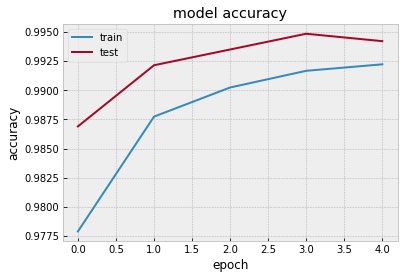

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

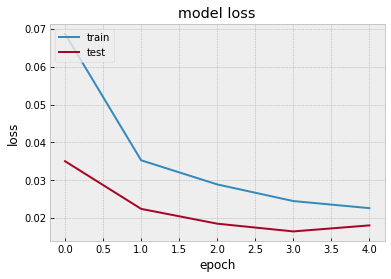

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
pred = Neural_Network_Model.predict(X_test_scaled)
pred = np.argmax(pred,axis=1)

705/705 [==============================] - 1s 2ms/step


In [19]:
y_test1=np.argmax(y_test,axis=1)

In [20]:
y_test1

array([0, 0, 1, ..., 1, 0, 1])

In [21]:
labels=full_dataset_svm.label.unique()

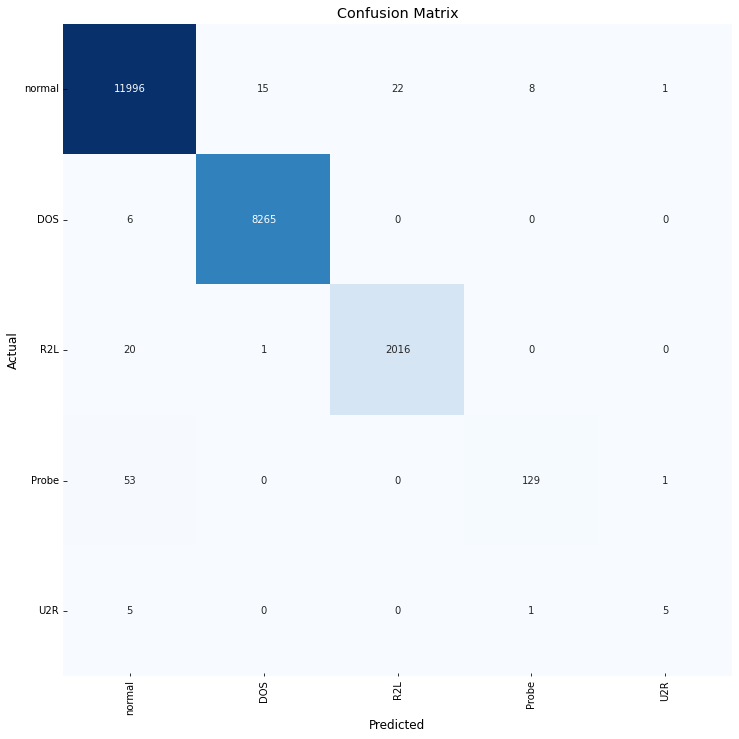

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(np.array(y_test1),np.array(pred))
# plot the confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(5)+.5, labels, rotation=90)
plt.yticks(np.arange(5)+.5, labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()